In [20]:
import pandas as pd
import yfinance as yf
import seaborn as sns
from datetime import date, timedelta
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import scipy.stats as stats
from statsmodels.tsa.stattools import adfuller
from datetime import date
d2 = date.today() - timedelta(days=200)
d2 = d2.strftime("%Y-%m-%d")
plt.rcParams['figure.figsize'] = [20, 10]

In [21]:
def lines():
    for y, color, linestyle in [(0, 'black', '-'),
                                (1.0, 'green', '-'),
                                (2.5, 'green', '--'),
                                (3, 'magenta', '--'),
                                (-1.0, 'red', '--'),
                                (-2.5, 'red', '--'),
                                (-3, 'magenta', '--')]:
        plt.axhline(y=y, color=color, linestyle=linestyle)

In [22]:
path =r'D:\rupeelog\repo\projectdata\code\live_data\ind_nifty500list.csv'
tickers=pd.read_csv(path)
tickers['Symbol']=tickers['Symbol']+str('.NS')
download=(tickers['Symbol'].to_list())

In [23]:
df=yf.download(tickers=download,start=d2)['Close']

[*********************100%%**********************]  499 of 499 completed


In [24]:
df.fillna(method='bfill',inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_30940\1626352436.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill',inplace=True)


In [25]:
# Calculate percentage change
df2 = df.pct_change().dropna()

# Calculate correlation matrix
corr = df2.corr()

# Print the columns of the correlation DataFrame
#print("Columns in correlation DataFrame:", corr.columns)
# Solution: Rename the index before resetting
corr.index.name = None  # Temporarily remove the index name
corr_long = corr.stack().reset_index()  # Now stack and reset index
corr_long.columns = ['stock1', 'stock2', 'correlation']  # Rename columns for clarity

# Optionally, drop duplicate pairs (if you want unique pairs)
corr_long = corr_long[corr_long['stock1'] < corr_long['stock2']]

# Display the long format DataFrame
print("\nLong Format Correlation DataFrame:")
print(corr_long)


Long Format Correlation DataFrame:
               stock1         stock2  correlation
1           360ONE.NS     3MINDIA.NS     0.000993
2           360ONE.NS    AARTIIND.NS     0.228199
3           360ONE.NS       AAVAS.NS     0.123879
4           360ONE.NS         ABB.NS     0.209726
5           360ONE.NS  ABBOTINDIA.NS     0.144876
...               ...            ...          ...
247502  ZENSARTECH.NS      ZOMATO.NS     0.204152
247503  ZENSARTECH.NS   ZYDUSLIFE.NS     0.306275
248001   ZFCVINDIA.NS      ZOMATO.NS     0.139628
248002   ZFCVINDIA.NS   ZYDUSLIFE.NS     0.017112
248501      ZOMATO.NS   ZYDUSLIFE.NS     0.248229

[124251 rows x 3 columns]


<Axes: xlabel='Ticker'>

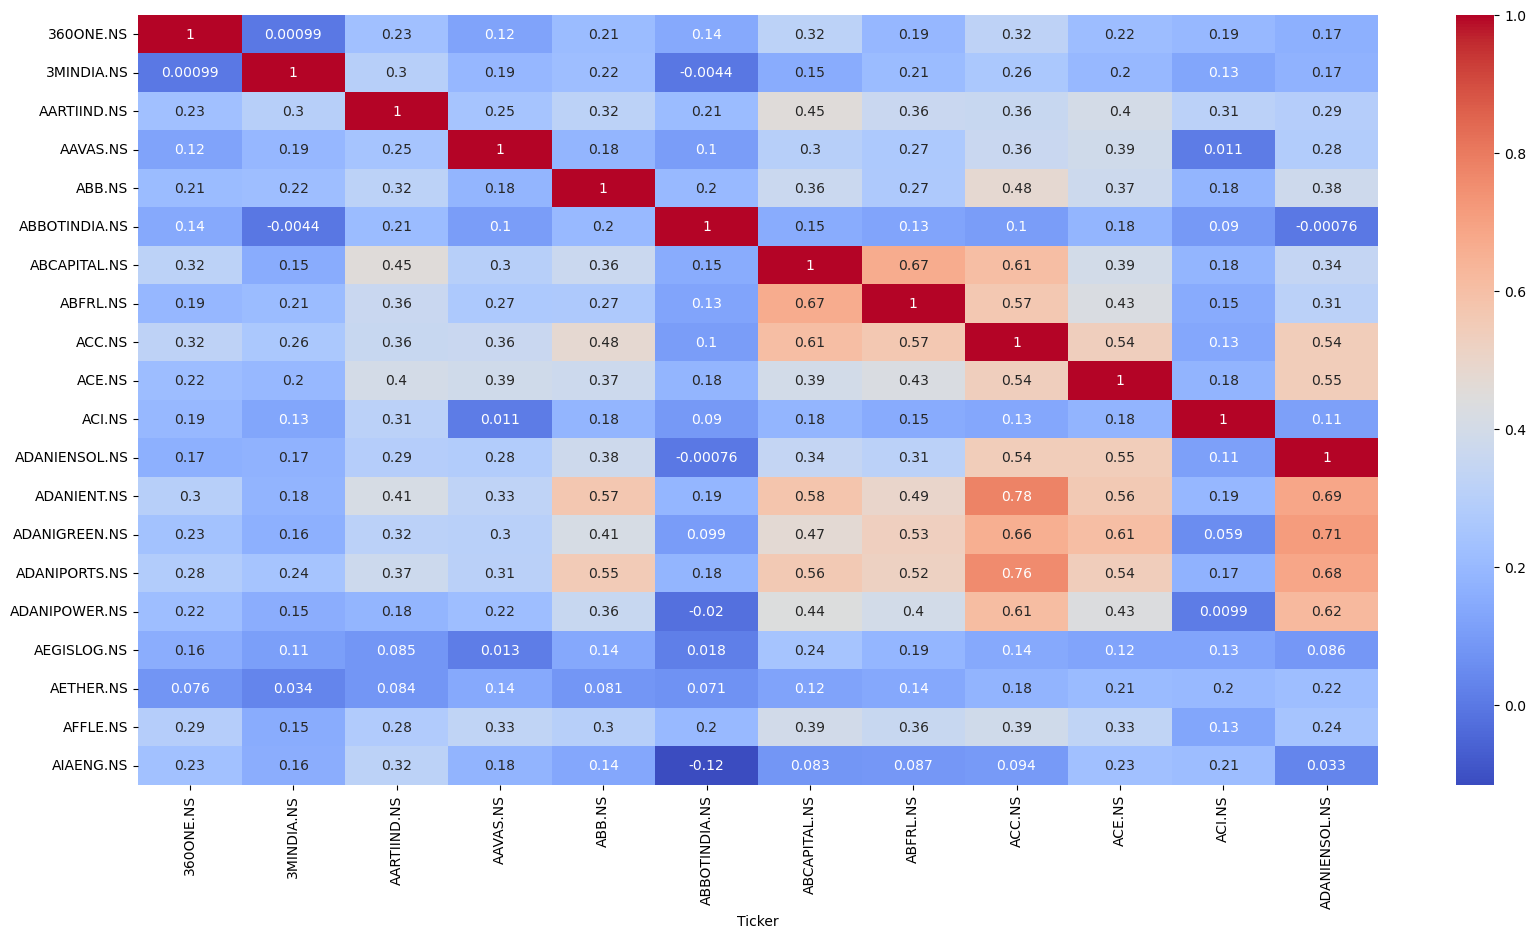

In [26]:
##Visualizing the correlation matrix

sns.heatmap(corr.iloc[:20, :12]
, annot=True, cmap='coolwarm')

In [27]:
##The final dataframe without repetitions
Finale=corr_long.loc[corr_long['correlation']!=1]
Finale=Finale.sort_values(by='correlation', ascending=False)
Finale=Finale.drop_duplicates('correlation')

In [14]:
##Selecting stocks with atleast 0.5 corrcoef value

Finale=Finale.loc[Finale['correlation']>0.5]

In [28]:
Finale

,stock1,stock2,correlation
117236,IOB.NS,UCOBANK.NS,0.945340
179031,PFC.NS,RECLTD.NS,0.942137
47376,CENTRALBK.NS,UCOBANK.NS,0.942052
109001,IDFC.NS,IDFCFIRSTB.NS,0.941698
47140,CENTRALBK.NS,IOB.NS,0.912841
...,...,...,...
196011,RENUKA.NS,SANOFI.NS,-0.258187
34637,BHEL.NS,HINDUNILVR.NS,-0.277862
8387,AEGISLOG.NS,SANOFI.NS,-0.285426
103133,HINDUNILVR.NS,NLCINDIA.NS,-0.330180


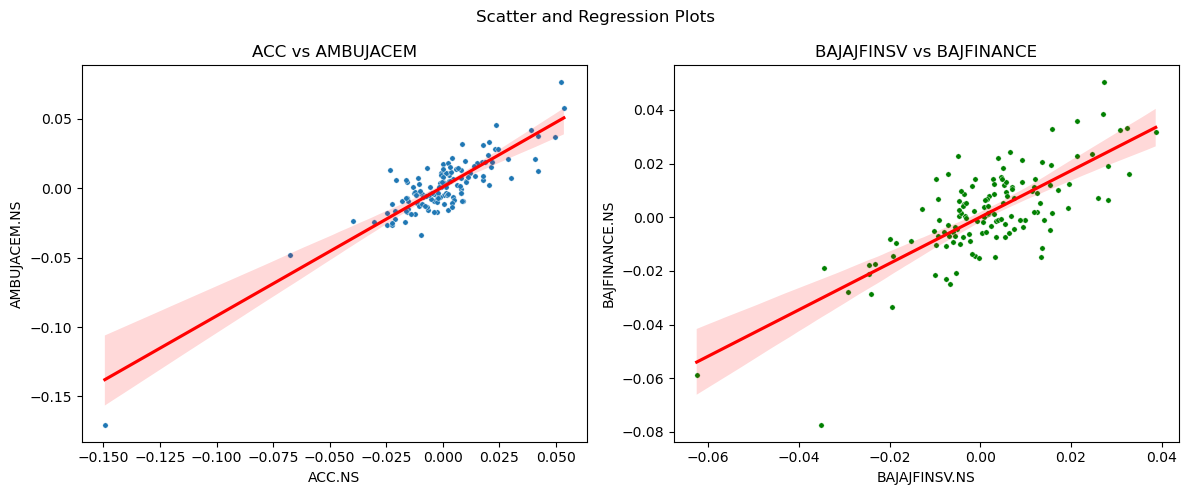

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# First subplot
sns.scatterplot(x=df2['ACC.NS'], y=df2['AMBUJACEM.NS'], data=df, ax=ax1,s=15)
sns.regplot(x=df2['ACC.NS'], y=df2['AMBUJACEM.NS'], data=df, color='red', scatter=False, ax=ax1)
ax1.set_xlabel('ACC.NS')
ax1.set_ylabel('AMBUJACEM.NS')
ax1.set_title('ACC vs AMBUJACEM')

# Second subplot
sns.scatterplot(x=df2['BAJAJFINSV.NS'], y=df2['BAJFINANCE.NS'], data=df, ax=ax2,s=15,color='green')
sns.regplot(x=df2['BAJAJFINSV.NS'], y=df2['BAJFINANCE.NS'], data=df, color='red', scatter=False, ax=ax2)
ax2.set_xlabel('BAJAJFINSV.NS')
ax2.set_ylabel('BAJFINANCE.NS')
ax2.set_title('BAJAJFINSV vs BAJFINANCE')

fig.suptitle('Scatter and Regression Plots')

# Adjust the spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()

In [30]:
##Take the pairs and convert them to numpy arrays
stock1=np.array(df[Finale['stock1'].iloc[60]])
stock2=np.array(df[Finale['stock2'].iloc[60]])



##Correlation

correlation=(df2[Finale['stock1'].iloc[0]]).corr(df2[Finale['stock2'].iloc[0]])
##Perform Linear Regression 
reg=np.polyfit(stock1,stock2, deg=1)
reg
trend=np.polyval(reg,stock1)

##Calculate residuals for ADF test

ratio=stock1/stock2

ratio=stats.zscore(ratio)

##Perform the ADF test

from statsmodels.tsa.stattools import adfuller

series = ratio
X = series
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if(result[1]<0.05):
    print("ADF test passed")
else:
    print("ADF test failed")


ADF Statistic: -1.812808
p-value: 0.374122
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
ADF test failed
